# Laboratory 8 - Model Evaulation

In [65]:
import numpy as np
import MVGClassifier
import MVGTClassifier
import sklearn.datasets
import matplotlib.pyplot as plt
def load_iris():
    D, L = sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']
    return D, L

## Confusion matrix - IRIS dataset

In [10]:
D, L = load_iris()
def split_db_2to1(D, L, seed=0):
    nTrain = int(D.shape[1]*2.0/3.0) # 2/3 of the dataset D are used for training, 1/3 for validation
    np.random.seed(seed)
    idx = np.random.permutation(D.shape[1]) # take a random array of 150 elements, each element is 0<x<=149 (np.arange(150))
    idxTrain = idx[0:nTrain] # first 100 are indices of training samples 
    idxTest = idx[nTrain:] # remaining 50 are indices of validation samples
    DTR = D[:, idxTrain] # D for training
    DTE = D[:, idxTest] # D for validation
    LTR = L[idxTrain] # L for training
    LTE = L[idxTest] # L for validation
    return (DTR, LTR), (DTE, LTE)
(DTR, LTR), (DTE, LTE) = split_db_2to1(D, L)

## MVG classifier

In [11]:
mvg_classifier = MVGClassifier.MVG(DTR, LTR)
mvg_classifier.train()
predicted_labels = mvg_classifier.test(DTE, LTE)
conf_matrix_MVG = mvg_classifier.confusion_matrix(predicted_labels, LTE)
conf_matrix_MVG

array([[19.,  0.,  0.],
       [ 0., 15.,  0.],
       [ 0.,  2., 14.]])

## Tied Covariance classifier

In [12]:
tied_classifier = MVGTClassifier.MVGT(DTR, LTR)
tied_classifier.train()
predicted_labels = tied_classifier.test(DTE, LTE)
conf_matrix_MVGT = tied_classifier.confusion_matrix(predicted_labels, LTE)
conf_matrix_MVGT

array([[19.,  0.,  0.],
       [ 0., 16.,  0.],
       [ 0.,  1., 14.]])

## Divina Commedia classfier

### Confusion matrix

In [20]:
commedia_labels = np.load('Data/commedia_labels.npy')
class_conditional_ll = np.load('Data/commedia_ll.npy')

In [21]:
predicted_labels = np.argmax(class_conditional_ll,axis=0)
i = 0
conf_matrix = np.zeros(shape=(3,3))
for predicted_label in predicted_labels:
    actual_label = commedia_labels[i] # class 0,1,2
    if predicted_label == actual_label: # correct label
        conf_matrix[predicted_label][predicted_label] += 1
    else:
        conf_matrix[predicted_label][actual_label] += 1
    i+=1
conf_matrix

array([[210., 113.,  61.],
       [137., 191., 111.],
       [ 53.,  98., 230.]])

### Optimal Bayes Decision - binary task

In [22]:
infpar_labels = np.load('Data/commedia_labels_infpar.npy')
infpar_ll = np.load('Data/commedia_llr_infpar.npy')

In [51]:
def optimal_bayes_decision(pi1, Cfn, Cfp):
    conf_matrix = np.zeros(shape=(2,2))
    t = -np.log((pi1*Cfn)/((1-pi1)*Cfp))
    predicted_label = np.array(infpar_ll > t, dtype='int32')
    i = 0
    for pl in predicted_label:
        if pl == infpar_labels[i]:
            conf_matrix[pl][pl] += 1
        else:
            conf_matrix[pl][infpar_labels[i]] += 1
        i += 1
    return conf_matrix

In [52]:
pi1 = 0.5
Cfn=1
Cfp=1
optimal_bayes_decision(pi1,Cfn,Cfp)

array([[293.,  96.],
       [109., 304.]])

In [53]:
pi1 = 0.8
Cfn=1
Cfp=1
optimal_bayes_decision(pi1,Cfn,Cfp)

array([[271.,  80.],
       [131., 320.]])

In [54]:
pi1 = 0.5
Cfn=10
Cfp=1
optimal_bayes_decision(pi1,Cfn,Cfp)

array([[257.,  75.],
       [145., 325.]])

In [55]:
pi1 = 0.8
Cfn=1
Cfp=10
optimal_bayes_decision(pi1,Cfn,Cfp)

array([[302., 113.],
       [100., 287.]])

### ROC curves

In [66]:
def optimal_bayes_decision_t(t):
    conf_matrix = np.zeros(shape=(2,2))
    predicted_label = np.array(infpar_ll > t, dtype='int32')
    i = 0
    for pl in predicted_label:
        if pl == infpar_labels[i]:
            conf_matrix[pl][pl] += 1
        else:
            conf_matrix[pl][infpar_labels[i]] += 1
        i += 1
    return conf_matrix

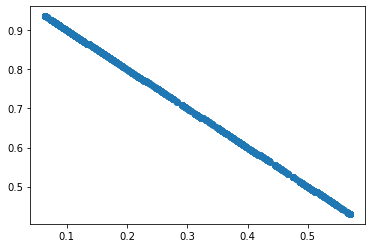

In [81]:
FPRvalues = []
TPRvalues = []
for t in np.linspace(-10, 10, 1000):
    conf_matrix = optimal_bayes_decision_t(t)
    FP = conf_matrix[1,0]
    TN = conf_matrix[0,0]
    FPR = FP/(FP+TN)
    TPR = 1-FPR
    FPRvalues.append(FPR)
    TPRvalues.append(TPR)
plt.scatter(FPRvalues, TPRvalues)
   